In [1]:
#Import the tools for analysis
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.25)
import itertools

In [2]:
#Import the data into a DF and view the first 10 entries
movsData = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movsData.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Text(0.5,1,'Movie Count by Year')

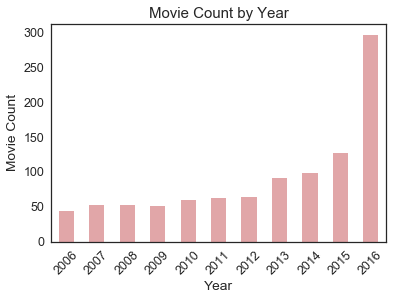

In [3]:
#Determine the amount of movies that were produced each year, from 2006-2016
movie_yearly_count = movsData['Year'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

In [4]:
#Create an array that contains the column names for what we want to compare the ratings to
#in order to see if ratings have any correlation with other aspects of the movies
ratings_comparisons = ['Revenue (Millions)', 'Metascore', 'Runtime (Minutes)', 'Votes']

C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\RaviRohanChaitu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\RaviRohanChaitu\Ana

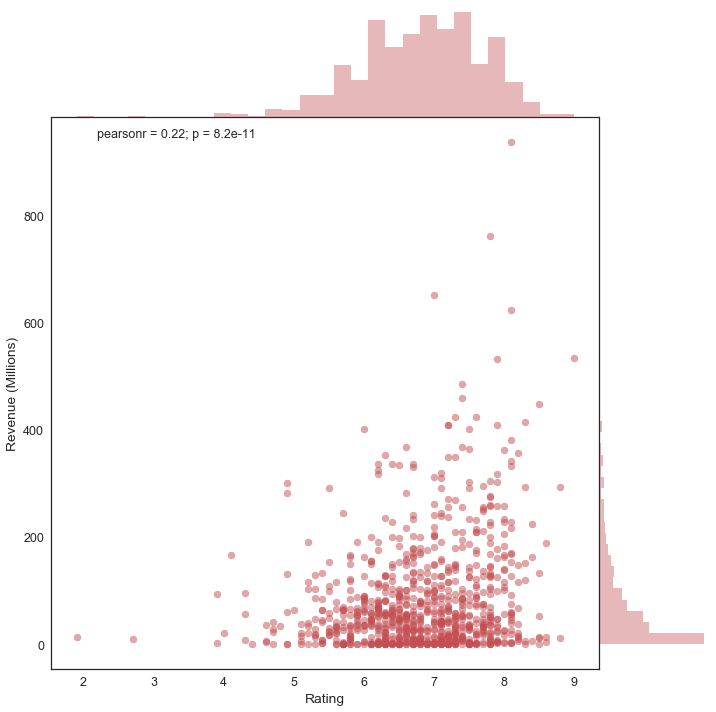

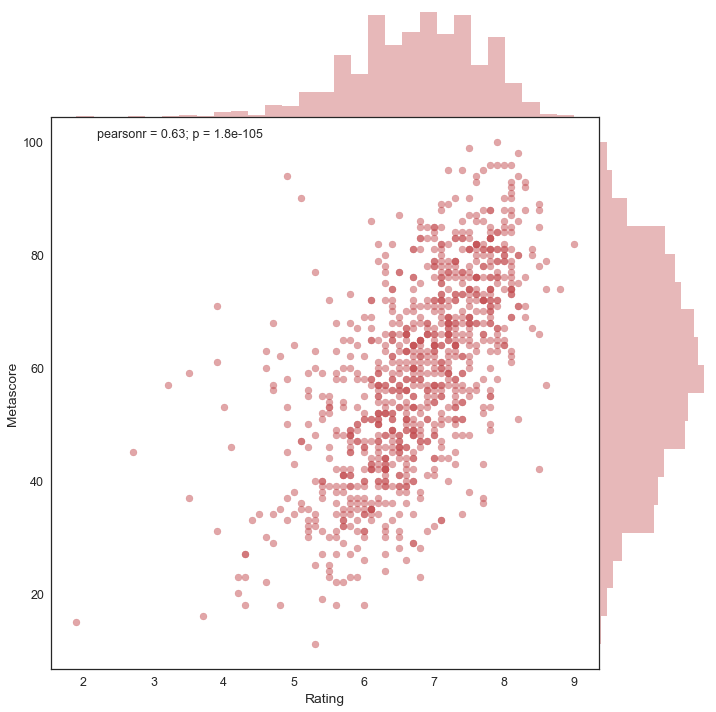

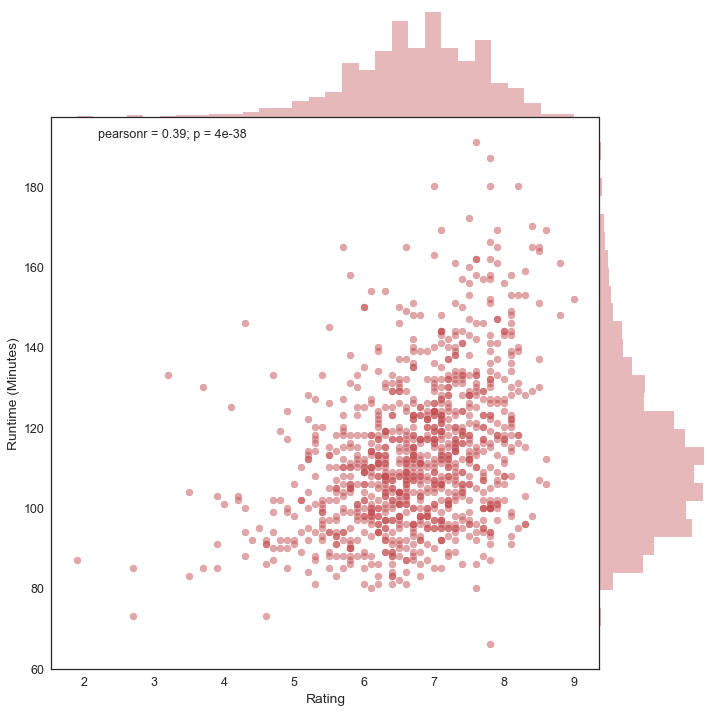

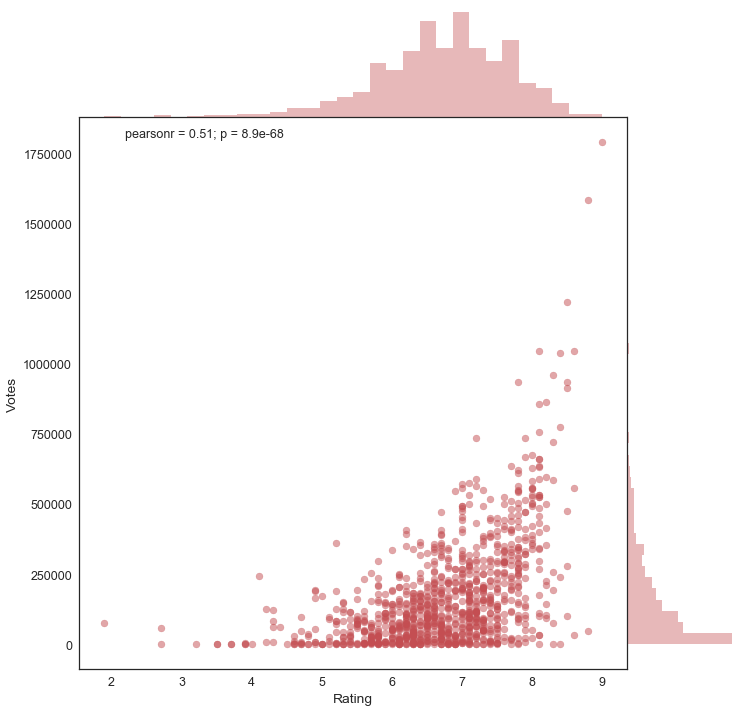

In [6]:
#Created a for loop that iterates through each of the comparisons made above and plots them separately
for comparison in ratings_comparisons:
    sns.jointplot(x='Rating', y=comparison, data=movsData, alpha=0.5, color='r', size=10, space=0)

In [7]:
#Since most of these films in the data set are part of multiple genres, we need to get a list
#of entirely unique genres, without repeats, to see how many genres we are truly dealing with

unique_genres = movsData['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Number of movies in each genre: 

Musical 5
Action 303
Music 21
Fantasy 101
Biography 81
War 13
Sci-Fi 120
Thriller 195
Adventure 259
History 29
Crime 150
Horror 119
Drama 513
Mystery 106
Comedy 279
Western 7
Sport 18
Animation 49
Family 51
Romance 141


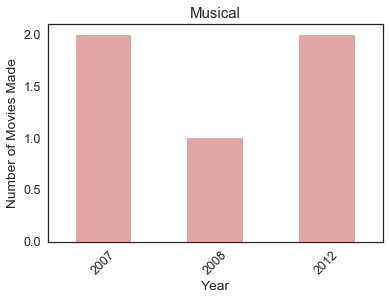

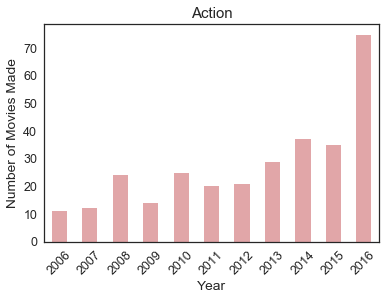

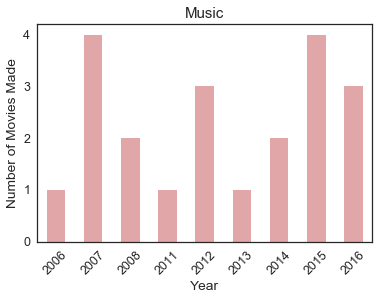

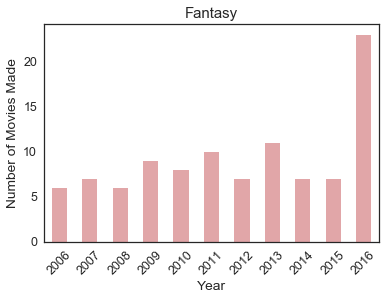

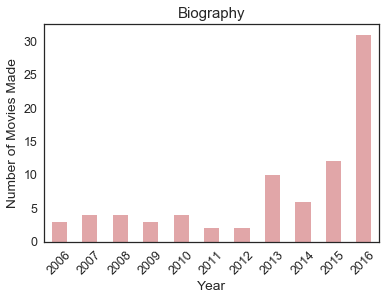

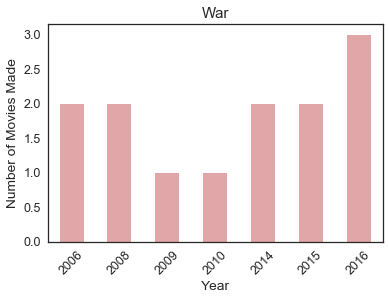

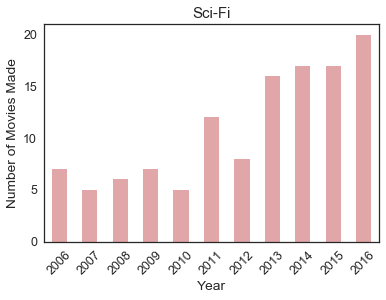

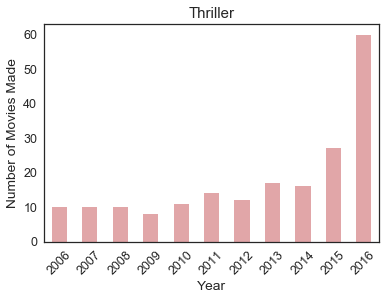

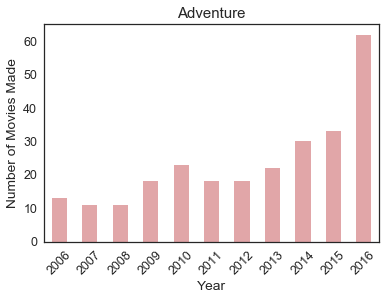

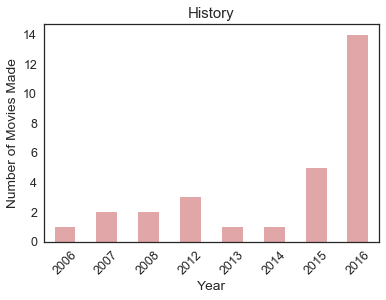

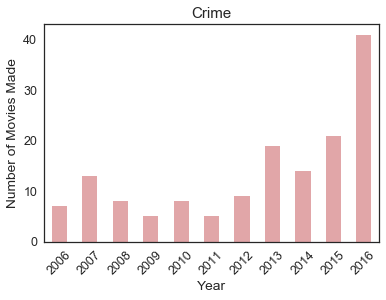

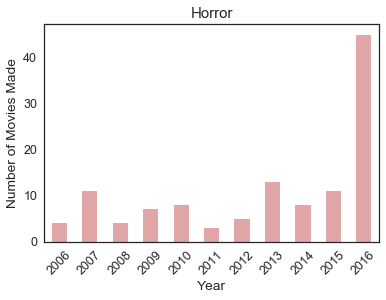

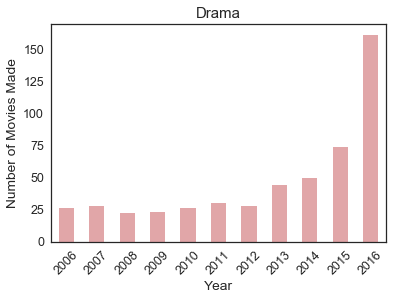

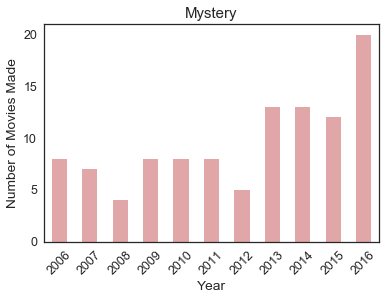

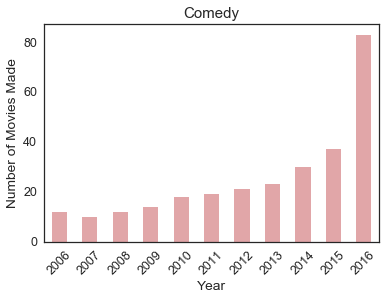

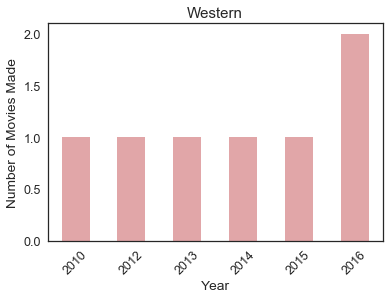

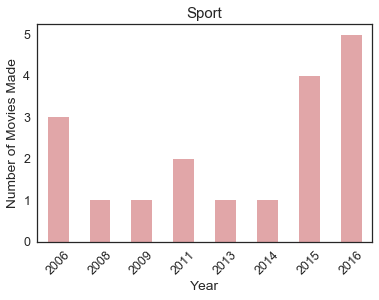

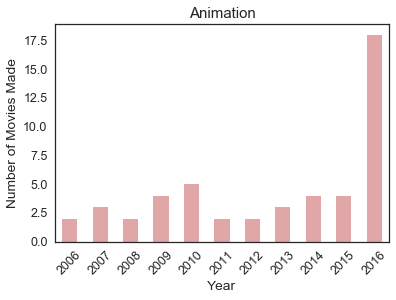

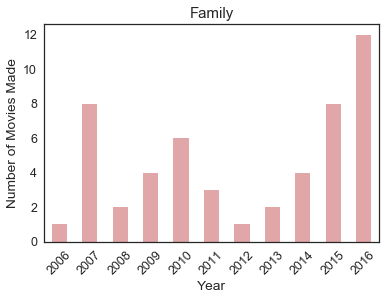

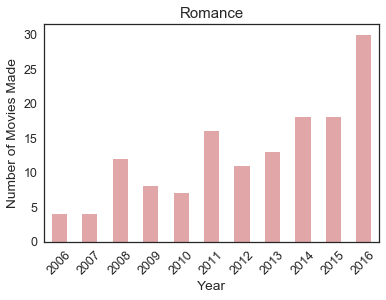

In [9]:
#Now we can iterate through each genre, counting the number of films that contain that genre
#then plot how many films of each genre were made by year onto a bar graph

print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = movsData['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    movsData[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(movsData[current_genre]))

In [12]:
#Determine the percent of total entries are attributed to each genre. Keep in mind that 
#since some films have multiple genres, these percentages won't add to 100%

genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movsData['Genre'].str.contains(genre).fillna(False)
    pct = len(movsData[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Musical 0.5
Action 30.3
Music 2.1
Fantasy 10.100000000000001
Biography 8.1
War 1.3
Sci-Fi 12.0
Thriller 19.5
Adventure 25.900000000000002
History 2.9000000000000004
Crime 15.0
Horror 11.899999999999999
Drama 51.300000000000004
Mystery 10.6
Comedy 27.900000000000002
Western 0.7000000000000001
Sport 1.7999999999999998
Animation 4.9
Family 5.1
Romance 14.099999999999998


In [13]:
#Throw our genre percentage values into a DF for easy plotting

genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Musical,0.5
Action,30.3
Music,2.1
Fantasy,10.1
Biography,8.1
War,1.3
Sci-Fi,12.0
Thriller,19.5
Adventure,25.9
History,2.9


Text(0.5,1,'Percent of Total Movies Made from Top 5 Genres')

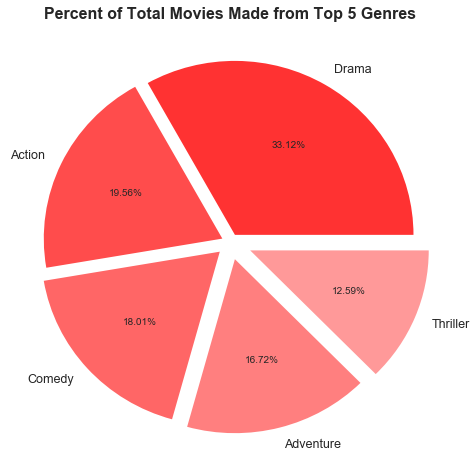

In [14]:
#Taking a sum of the total movies made from the top 5 genres,
#which contributed to the most in terms of movies made?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

In [16]:
#Same idea as above, but we can determine revenue percentage

genre_revenue_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movsData['Genre'].str.contains(genre).fillna(False)
    revenue_pct = movsData[current_genre].xs('Revenue (Millions)', axis=1).sum() / movsData['Revenue (Millions)'].sum() * 100
    genre_revenue_pcts[i] = revenue_pct
    i += 1
    print(genre, revenue_pct)

Musical 0.5643095271141182
Action 49.22093462408949
Music 1.5403530870928626
Fantasy 16.951072438315926
Biography 5.785510124974495
War 0.7386578222554245
Sci-Fi 20.612663116294684
Thriller 14.716090970771086
Adventure 53.709850263955474
History 1.902210125914527
Crime 11.107059142945145
Horror 4.718947009288069
Drama 30.31803772182683
Mystery 6.721035539293616
Comedy 26.70306157375741
Western 0.7729275196591113
Sport 1.4386360909265343
Animation 12.42432050890017
Family 8.546840414078586
Romance 7.579547446458265


In [18]:
genre_revenue_pcts_df = pd.DataFrame(genre_revenue_pcts, index=individual_genres, columns=['Percent'])
genre_revenue_pcts_df

,Percent
Musical,0.564310
Action,49.220935
Music,1.540353
Fantasy,16.951072
Biography,5.785510
War,0.738658
Sci-Fi,20.612663
Thriller,14.716091
Adventure,53.709850
History,1.902210


Text(0.5,1,'Percent of Total Revenue from Top 5 Genres')

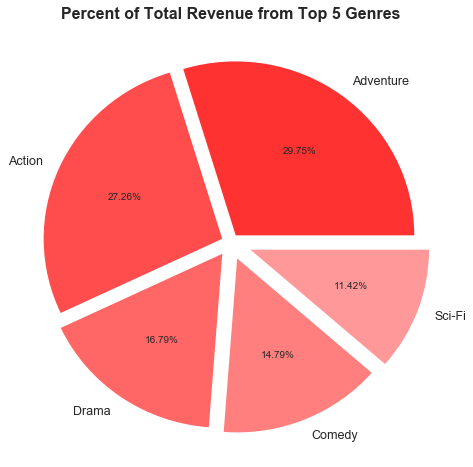

In [19]:
#Taking a sum of the revenue from the top 5 genres,
#which contributed to the most in terms of revenue?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Revenue from Top 5 Genres', weight='bold', fontsize=16)

In [20]:
#Find the most active directors, 'most active' being defined as number of films with their name on it
most_active_directors = movsData['Director'].value_counts().head(10)
most_active_directors.index

Index(['Ridley Scott', 'Michael Bay', 'Paul W.S. Anderson',
       'M. Night Shyamalan', 'David Yates', 'Denis Villeneuve', 'Peter Berg',
       'Antoine Fuqua', 'J.J. Abrams', 'Justin Lin'],
      dtype='object')

In [21]:
#Determine how much revenue each of these top 10 directors' films brought in 
#(as a sum for each director) in millions

director_revenue_totals = np.zeros(len(most_active_directors))
i = 0
for director in most_active_directors.index:
    current_director = movsData['Director'].str.contains(director).fillna(False)
    director_film_revenue = movsData[current_director].xs('Revenue (Millions)', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
    print(director, director_film_revenue)

Ridley Scott 719.06
Michael Bay 1421.32
Paul W.S. Anderson 208.92
M. Night Shyamalan 370.48999999999995
David Yates 1630.51
Denis Villeneuve 216.21
Peter Berg 511.33
Antoine Fuqua 393.21000000000004
J.J. Abrams 1683.4499999999998
Justin Lin 824.79


In [22]:
director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=most_active_directors.index, columns=['Revenue (Millions)'])
director_revenue_totals_df

,Revenue (Millions)
Ridley Scott,719.06
Michael Bay,1421.32
Paul W.S. Anderson,208.92
M. Night Shyamalan,370.49
David Yates,1630.51
Denis Villeneuve,216.21
Peter Berg,511.33
Antoine Fuqua,393.21
J.J. Abrams,1683.45
Justin Lin,824.79


Text(0.5,1,'Most Active Directors Revenue Contribution')

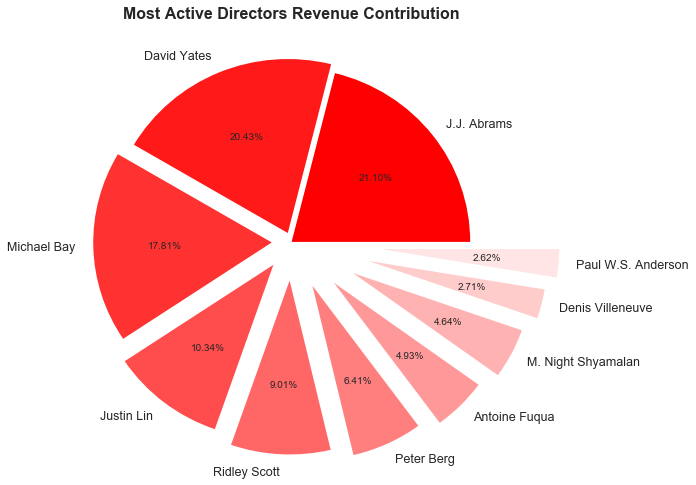

In [23]:
#Taking the sum of the revenue of the films made by the top 10 directors, which contributed the most?

explode = np.linspace(0, 0.5, 10)
colors = ['#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc', '#ffe5e5', ]
director_revenue_totals_df.sort_values(by='Revenue (Millions)', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=16)